<a href="https://colab.research.google.com/github/kazu-gor/Boat-race-prediction/blob/master/race_predict_1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import models, layers, regularizers, callbacks
from google.colab import files

# Upload the file by Google Colaboratory library

## Upload the train data

In [ ]:
uploaded = files.upload()

Saving program_edition.csv to program_edition.csv


In [ ]:
for filename1, _ in uploaded.items():
  pass  

In [ ]:
names = ["Place", "Number", "Name", "Age", "Live", "Weight", "Rank", "A_1st", "A_2nd", "B_1st", "B_2nd", "Moter_No", "Moter_2nd", "Bote_No", "Bote_2nd"]
df_x = pd.read_csv(filename1, names = names).drop(["Name", "Live", "Number"], axis=1).fillna(0)
df_x.head(3)

,Place,Age,Weight,Rank,A_1st,A_2nd,B_1st,B_2nd,Moter_No,Moter_2nd,Bote_No,Bote_2nd
0,1,39,54,A1,5.61,38.14,6.17,42.11,7,30.30,60,29.52
1,2,45,53,A1,6.54,47.58,6.50,50.00,49,27.74,46,37.71
2,3,32,55,A1,6.81,50.88,8.60,64.00,53,39.27,72,40.00


## Upload the test data

In [ ]:
uploaded2 = files.upload()

Saving sorted_answer.csv to sorted_answer.csv


In [ ]:
for filename2, _ in uploaded2.items():
  pass

names = ["Place", "y"]
df_y = pd.read_csv(filename2, names = names).drop(["Place"], axis=1)

In [ ]:
df = pd.merge(df_x, df_y, how="left", left_index=True, right_index=True)
df.head(6)

,Place,Age,Weight,Rank,A_1st,A_2nd,B_1st,B_2nd,Moter_No,Moter_2nd,Bote_No,Bote_2nd,y
0,1,39,54,A1,5.61,38.14,6.17,42.11,7,30.30,60,29.52,0
1,2,45,53,A1,6.54,47.58,6.50,50.00,49,27.74,46,37.71,1
2,3,32,55,A1,6.81,50.88,8.60,64.00,53,39.27,72,40.00,0
3,4,51,52,A2,6.31,48.65,6.51,58.97,20,33.33,18,36.11,0
4,5,36,55,A2,6.85,51.58,6.97,56.25,51,29.14,39,38.07,0
5,6,31,51,A1,6.04,38.27,6.86,57.86,8,34.41,27,34.34,0


In [ ]:
df.isnull().sum()

Place        0
Age          0
Weight       0
Rank         0
A_1st        0
A_2nd        0
B_1st        0
B_2nd        0
Moter_No     0
Moter_2nd    0
Bote_No      0
Bote_2nd     0
y            0
dtype: int64

# OneHotEncoding

In [ ]:
df_dummies = pd.get_dummies(df["Rank"])
df_dummies.astype("float32")

,A1,A2,B1,B2
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
17629,1.0,0.0,0.0,0.0
17630,1.0,0.0,0.0,0.0
17631,1.0,0.0,0.0,0.0
17632,1.0,0.0,0.0,0.0


In [ ]:
df = df.drop('Rank', axis=1)
df.astype("float32").head(1)  

,Place,Age,Weight,A_1st,A_2nd,B_1st,B_2nd,Moter_No,Moter_2nd,Bote_No,Bote_2nd,y
0,1.0,39.0,54.0,5.61,38.139999,6.17,42.110001,7.0,30.299999,60.0,29.52,0.0


In [ ]:
df = pd.merge(df, df_dummies, how="left", left_index=True, right_index=True)
df.head()

,Place,Age,Weight,A_1st,A_2nd,B_1st,B_2nd,Moter_No,Moter_2nd,Bote_No,Bote_2nd,y,A1,A2,B1,B2
0,1,39,54,5.61,38.14,6.17,42.11,7,30.30,60,29.52,0,1,0,0,0
1,2,45,53,6.54,47.58,6.50,50.00,49,27.74,46,37.71,1,1,0,0,0
2,3,32,55,6.81,50.88,8.60,64.00,53,39.27,72,40.00,0,1,0,0,0
3,4,51,52,6.31,48.65,6.51,58.97,20,33.33,18,36.11,0,0,1,0,0
4,5,36,55,6.85,51.58,6.97,56.25,51,29.14,39,38.07,0,0,1,0,0


# Split the train data and test data

In [ ]:
y = df.iloc[:, -5].values.astype("float32")
X = df.drop("y", axis=1).values.astype("float32")

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14107, 15), (3527, 15), (14107,), (3527,))

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std

y_train -= mean
y_train /= std

# Construct the model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1], )))
model.add(layers.Dropout(0.49))
model.add(layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.49))
model.add(layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.49))
model.add(layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.49))
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

# Fit the model

In [ ]:
EPOCHS=1000
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train,
                    X_test,
                    epochs=EPOCHS,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/1000
23/23 [==============================] - 0s 13ms/step - loss: 1.7402 - acc: 0.7087 - val_loss: 1.5568 - val_acc: 0.8363
Epoch 2/1000
23/23 [==============================] - 0s 6ms/step - loss: 1.4465 - acc: 0.8127 - val_loss: 1.3754 - val_acc: 0.8281
Epoch 3/1000
23/23 [==============================] - 0s 6ms/step - loss: 1.3011 - acc: 0.8277 - val_loss: 1.2530 - val_acc: 0.8306
Epoch 4/1000
23/23 [==============================] - 0s 6ms/step - loss: 1.1869 - acc: 0.8279 - val_loss: 1.1417 - val_acc: 0.8076
Epoch 5/1000
23/23 [==============================] - 0s 5ms/step - loss: 1.0712 - acc: 0.8289 - val_loss: 1.0089 - val_acc: 0.8391
Epoch 6/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.9672 - acc: 0.8327 - val_loss: 0.9138 - val_acc: 0.8391
Epoch 7/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.8664 - acc: 0.8373 - val_loss: 0.8248 - val_acc: 0.8434
Epoch 8/1000
23/23 [==============================] - 0s 5ms/step - loss: 0

# Evaluate the model

In [ ]:
score = model.evaluate(y_train, y_test)
print("loss : {}".format(score[0]))
print("Test score : {}".format(score[1]))

111/111 [==============================] - 0s 2ms/step - loss: 0.4480 - acc: 0.8188
loss : 0.44802385568618774
Test score : 0.8188261985778809


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Plot the training and validation loss

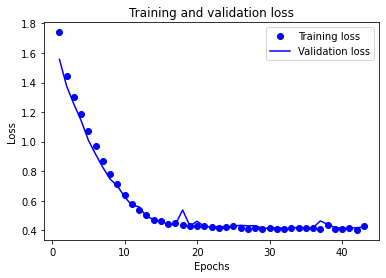

In [ ]:
  import matplotlib.pyplot as plt

  #ドットは訓練データを表しており、折れ線は検証データを表しています

  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  epochs = range(1, len(loss_values) + 1)

  #”bo”は”blue dot”（青のドット）を意味する
  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  #”b”は"solid blue line"(青の実線）を意味する
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

# Plot the training and validation accuracy

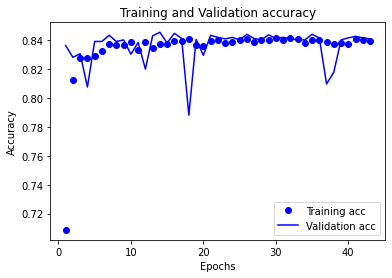

In [ ]:
#図を消去
#ドットは訓練データでの結果、折れ線は検証データでの結果
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.predict(y_train)

array([[0.21825072],
       [0.27279532],
       [0.24371007],
       ...,
       [0.25476125],
       [0.16886793],
       [0.15688522]], dtype=float32)

# Save the weights

In [ ]:
open("and.json", "w").write(model.to_json())

model.save_weights("and.h5")